In [1]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# 设置中文显示
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False
# 设置新罗马字体
font = {'family' : 'Times New Roman'}

In [3]:
def get_mysql_data(sql):
    """
    提取mysql中的数据并返回成dataframe
    参数只需要sql语句

    """
    conn = pymysql.connect(
        host='localhost',
        user='root',
        password='agsj2735',
        db='price',
        port=3306
    )
    cur = conn.cursor()  # 获取操作游标，也就是开始操作
    sql_select = sql  # 查询命令
    cur.execute(sql_select)  # 执行查询语句

    result = cur.fetchall()  # 获取查询结果
    col_result = cur.description  # 获取查询结果的字段描述

    columns = []
    for i in range(len(col_result)):
        columns.append(col_result[i][0])  # 获取字段名，咦列表形式保存

    df = pd.DataFrame(columns=columns)
    for i in range(len(result)):
        df.loc[i] = list(result[i])  # 按行插入查询到的数据

    conn.close()  # 关闭数据库连接

    return df

In [4]:
sql = 'select * from pc'
df = get_mysql_data(sql)
# 填充 NA 值
df = df.fillna(0)

In [5]:
df

,id,date,cpu,graph,ddr,ssd,board,power,box,wind
0,1,2020-11-01 11:48:56,1349.0,0.0,449.0,439.0,699.0,219.0,169.0,69.0
1,2,2020-11-02 21:27:07,1399.0,0.0,449.0,479.0,699.0,239.0,169.0,69.0
2,3,2020-11-03 23:02:00,1349.0,0.0,449.0,439.0,699.0,259.0,169.0,72.0
3,4,2020-11-06 18:45:38,1349.0,0.0,479.0,449.0,799.0,239.0,169.0,75.0
4,5,2020-11-07 11:55:08,1349.0,0.0,479.0,479.0,799.0,239.0,199.0,89.0
5,6,2020-11-08 23:20:18,1399.0,0.0,479.0,499.0,729.0,229.0,199.0,89.0
6,7,2020-11-09 20:56:34,1399.0,0.0,469.0,479.0,799.0,249.0,189.0,89.0
7,8,2020-11-10 19:44:36,1399.0,0.0,479.0,479.0,799.0,259.0,189.0,89.0
8,9,2020-11-11 20:30:11,1349.0,0.0,449.0,439.0,699.0,219.0,169.0,69.0
9,10,2020-12-10 21:12:52,1399.0,0.0,499.0,479.0,719.0,249.0,169.0,75.0


In [6]:
labels = ['CPU', '显卡', '内存条', '固态硬盘', '主板', '电源', '机箱', '风扇']

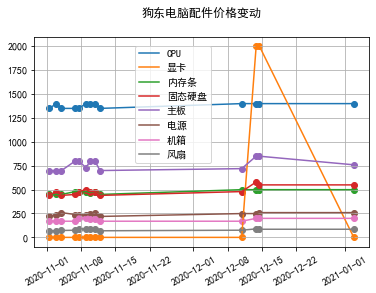

In [7]:
plt.figure()
for i in range(2,10): # 不包括终止值
    plt.scatter(df.date, df.iloc[:, i])
    plt.plot(df.date, df.iloc[:, i])
plt.legend(labels, loc = [0.3, 0.4]) # x 左右, y 上下
plt.title('狗东电脑配件价格变动', pad = 20)
plt.xticks(rotation = 30)
plt.gcf().subplots_adjust(bottom=0.15)  # 使底部显示完整
plt.grid()
plt.savefig(r'C:\Users\BXDM\Desktop\jd.png', dpi = 300)



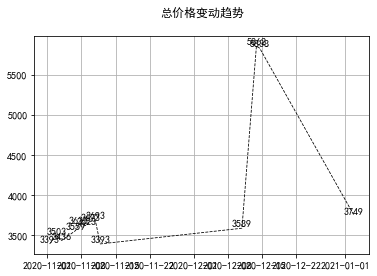

In [8]:
# 总价变动
prices = []
plt.figure()
for i in range(len(df)):
    price = df.iloc[i, np.arange(2, 10)]
    price = np.sum(price)
    prices.append(price)
plt.plot(df.date, prices, '--k', linewidth = 0.8)
# 添加数据标签
for a,b in zip(df.date,prices):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom')
plt.title('总价格变动趋势', pad = 20)
plt.grid()

([<matplotlib.patches.Wedge at 0x13754fd0>,
 [Text(0.4267996118240383, 1.0138254738103845, ''),
  Text(-0.7688038024488186, 0.7867278521447159, ''),
  Text(-1.0220331357843788, 0.4067533274095611, ''),
  Text(-0.9656375968439507, -0.5268244788935306, ''),
  Text(0.02718968495962734, -1.0996639127623478, ''),
  Text(0.8462586792761582, -0.7027419496157694, ''),
  Text(1.047829953989904, -0.3347422702939016, ''),
  Text(1.097210758807647, -0.07828506087848265, '')])

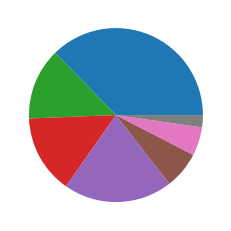

In [9]:
today = df.iloc[len(df) - 1, np.arange(2,10)]
plt.pie(today)

In [10]:
today

cpu      1399
graph       0
ddr       499
ssd       549
board     759
power     259
box       199
wind       85
Name: 12, dtype: object

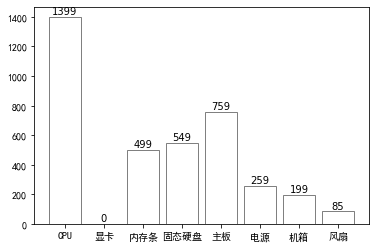

In [11]:
plt.bar(labels,today,
       facecolor = 'white',
       edgecolor = 'gray')
for a,b in zip(labels,today):
    plt.text(a, b+5, '%.0f' % b, ha='center', va= 'bottom', 
            fontname = 'DejaVu Sans',  fontsize = 10)
            # font, fontsize = 9) 

In [12]:
a = df.iloc[10, np.arange(2,10)]
a

cpu      1399
graph    1999
ddr       499
ssd       579
board     849
power     249
box       199
wind       89
Name: 10, dtype: object

In [13]:
df.columns.tolist()

['id', 'date', 'cpu', 'graph', 'ddr', 'ssd', 'board', 'power', 'box', 'wind']

In [14]:
for i in range(len(df)):
    price = df.iloc[i, [2, 3, 4]]
    price = np.sum(price)

In [15]:
df.graph

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10    1999.0
11    1999.0
12       0.0
Name: graph, dtype: float64